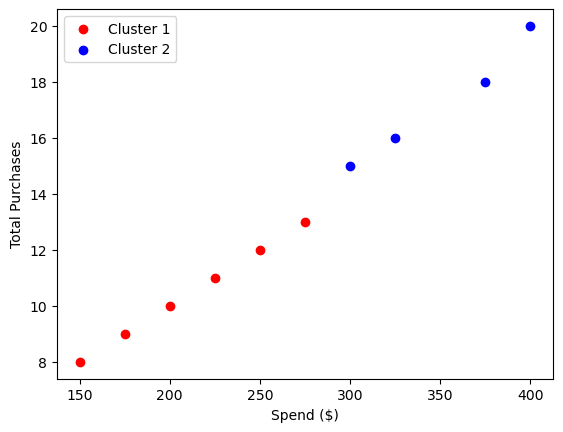

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a dataframe with the given data
customers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
spend = [250, 150, 300, 200, 175, 225, 275, 325, 400, 375]
purchases = [12, 8, 15, 10, 9, 11, 13, 16, 20, 18]
data = {'Customers': customers, 'Spend ($)': spend, 'Total Purchases': purchases}
df = pd.DataFrame(data)

# Standardize the data
df_standardized = (df - df.mean()) / df.std()

# Perform k-means clustering with k=2
k = 1
kmeans = KMeans(n_clusters=k, random_state=42).fit(df_standardized[['Spend ($)', 'Total Purchases']])
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['Spend ($)'][df['Cluster'] == 0], df['Total Purchases'][df['Cluster'] == 0], c='red', label='Cluster 1')
plt.scatter(df['Spend ($)'][df['Cluster'] == 1], df['Total Purchases'][df['Cluster'] == 1], c='blue', label='Cluster 2')
plt.xlabel('Spend ($)')
plt.ylabel('Total Purchases')
plt.legend()
plt.show()


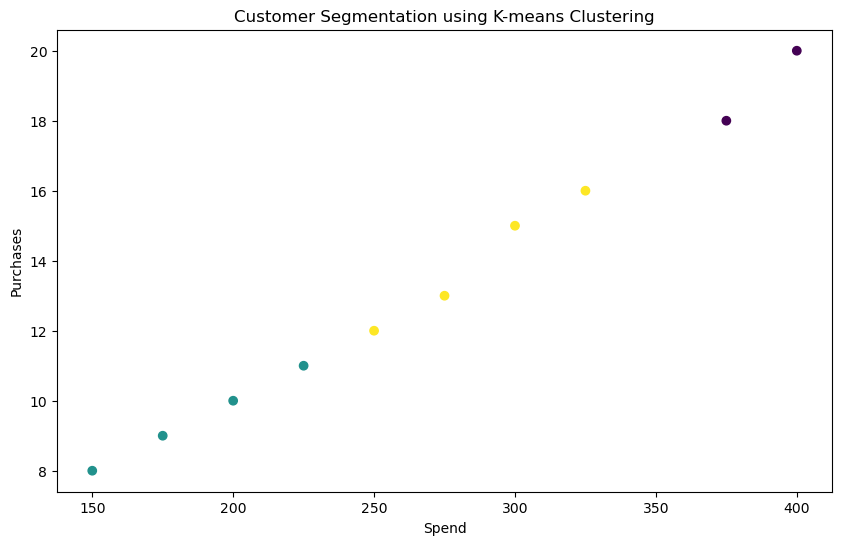

Cluster Labels:  [2 1 2 1 1 1 2 2 0 0]
Centroids:  [[387.5  19. ]
 [187.5   9.5]
 [287.5  14. ]]


In [11]:
# problem 1

import numpy as np
from sklearn.cluster import KMeans

# Create a numpy array from the data
X = np.array(list(zip(spend, purchases)))

# Define the number of clusters (k)
k = 3

# Create a KMeans object with k clusters
kmeans = KMeans(n_clusters=k)

# Fit the data to the k-means model
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(spend, purchases, c=labels, cmap='viridis')
plt.xlabel('Spend')
plt.ylabel('Purchases')
plt.title('Customer Segmentation using K-means Clustering')
plt.show()

# Get the centroids of each cluster
centroids = kmeans.cluster_centers_

# Print the cluster labels and centroids
print("Cluster Labels: ", labels)
print("Centroids: ", centroids)


In [12]:
# problem 2

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score, v_measure_score, adjusted_rand_score

# Customer data
customers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
spend = [250, 150, 300, 200, 175, 225, 275, 325, 400, 375]
purchases = [12, 8, 15, 10, 9, 11, 13, 16, 20, 18]
X = np.array(list(zip(spend, purchases)))

# K-means clustering
n_clusters = 3  # Number of clusters obtained from the previous question
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# True segment labels
true_labels = [1, 0, 1, 0, 0, 1, 1, 2, 2, 2]

# Calculate accuracy
accuracy = accuracy_score(true_labels, cluster_labels)

# Calculate homogeneity score
homogeneity = homogeneity_score(true_labels, cluster_labels)

# Calculate v-measure score
v_measure = v_measure_score(true_labels, cluster_labels)

# Calculate adjusted rand score
adjusted_rand = adjusted_rand_score(true_labels, cluster_labels)

# Print the results
print('Accuracy: {:.4f}'.format(accuracy))
print('Homogeneity Score: {:.4f}'.format(homogeneity))
print('V Measure Score: {:.4f}'.format(v_measure))
print('Adjusted Rand Score: {:.4f}'.format(adjusted_rand))


Accuracy: 0.3000
Homogeneity Score: 0.5869
V Measure Score: 0.5962
Adjusted Rand Score: 0.3911


In [13]:
# just to improve efficiency, don't use.

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score, v_measure_score, adjusted_rand_score

# Customer data
customers = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
spend = np.array([250, 150, 300, 200, 175, 225, 275, 325, 400, 375])
purchases = np.array([12, 8, 15, 10, 9, 11, 13, 16, 20, 18])

# True segment labels
true_labels = np.array([1, 0, 1, 0, 0, 1, 1, 2, 2, 2])

# Perform k-means clustering
X = np.column_stack((spend, purchases)) # Stack spend and purchases as features
kmeans = KMeans(n_clusters=3, random_state=0) # Experiment with different values of k
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Calculate accuracy
accuracy = accuracy_score(true_labels, cluster_labels)

# Calculate evaluation metrics
homogeneity = homogeneity_score(true_labels, cluster_labels)
v_measure = v_measure_score(true_labels, cluster_labels)
adjusted_rand = adjusted_rand_score(true_labels, cluster_labels)

print("Accuracy: {:.2f}".format(accuracy))
print("Homogeneity Score: {:.2f}".format(homogeneity))
print("V Measure Score: {:.2f}".format(v_measure))
print("Adjusted Rand Score: {:.2f}".format(adjusted_rand))


Accuracy: 0.80
Homogeneity Score: 0.59
V Measure Score: 0.60
Adjusted Rand Score: 0.39


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scikitplot as skplt

# Load the diabetes dataset
diabetes_df = pd.read_csv('diabetes.csv')

# Split the data into train and test sets
X = diabetes_df.drop(columns=['diabetes_progression'])
y = diabetes_df['diabetes_progression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Build a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the diabetes progression for the test set
y_pred = regressor.predict(X_test)

# Predict the diabetes progression for the train set
y_train_pred = regressor.predict(X_train)

# Plot the actual vs predicted values for train set
skplt.scatterplot(y_train, y_train_pred)
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Actual vs Predicted Diabetes Progression (Train Set)')
plt.show()

# Plot the actual vs predicted values for test set
skplt.scatterplot(y_test, y_pred)
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Actual vs Predicted Diabetes Progression (Test Set)')
plt.show()

# Calculate RMSE and R-squared value
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the RMSE and R-squared value
print("RMSE: {:.2f}".format(rmse))
print("R-squared value: {:.2f}".format(r2))


ModuleNotFoundError: No module named 'scikitplot'

In [15]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 8.4/8.4 MB 17.8 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.0 MB/s eta 0:00:00


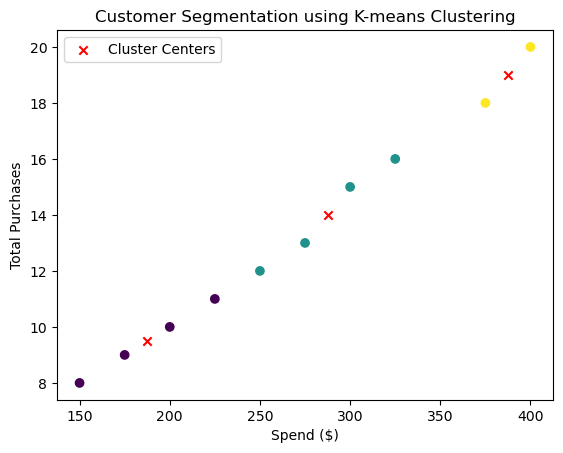

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data
customers = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
spend = np.array([250, 150, 300, 200, 175, 225, 275, 325, 400, 375])
total_purchases = np.array([12, 8, 15, 10, 9, 11, 13, 16, 20, 18])

# Create feature matrix
X = np.column_stack((spend, total_purchases))

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Predict cluster labels
labels = kmeans.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Cluster Centers')
plt.xlabel('Spend ($)')
plt.ylabel('Total Purchases')
plt.title('Customer Segmentation using K-means Clustering')
plt.legend()
plt.show()


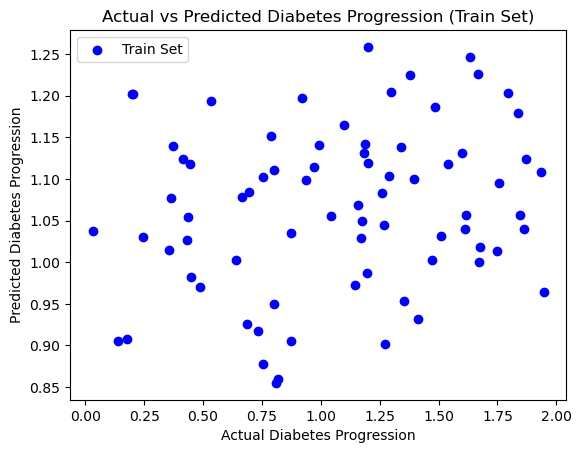

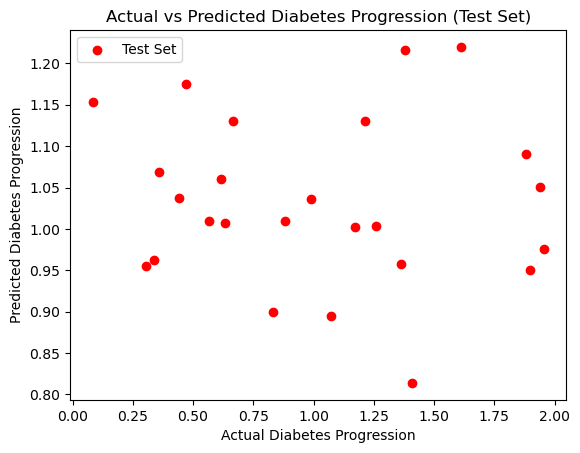

RMSE: 0.57
R-squared value: -0.06


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#import scikitplot as skplt
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes_df = pd.read_csv('diabetes.csv')

# Split the data into train and test sets
X = diabetes_df.drop(columns=['diabetes_progression'])
y = diabetes_df['diabetes_progression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Build a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the diabetes progression for the test set
y_pred = regressor.predict(X_test)

import matplotlib.pyplot as plt

# Predict the diabetes progression for the train set
y_train_pred = regressor.predict(X_train)

# Plot the actual vs predicted values for train set
plt.scatter(y_train, y_train_pred, c='blue', label='Train Set')
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Actual vs Predicted Diabetes Progression (Train Set)')
plt.legend()
plt.show()

# Predict the diabetes progression for the test set
y_test_pred = regressor.predict(X_test)

# Plot the actual vs predicted values for test set
plt.scatter(y_test, y_test_pred, c='red', label='Test Set')
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Actual vs Predicted Diabetes Progression (Test Set)')
plt.legend()
plt.show()


# Calculate RMSE and R-squared value
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the RMSE and R-squared value
print("RMSE: {:.2f}".format(rmse))
print("R-squared value: {:.2f}".format(r2))
